### **Taller 1 - Histogramas**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

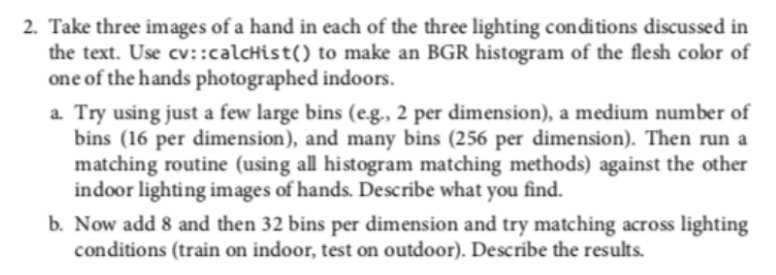

In [91]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable 

## pip install prettytable 
Mano_light  =   cv2.imread('Images/Img_Light_1.png',0)
Mano_shadow =   cv2.imread('Images/Img_Outdoor_1.png',0)
Mano        =   cv2.imread('Images/Img_Indoor_1.png',0)

<div>
<img id='Luz' src="Images/Html.png" width=1000>
</div>

**a. Comparación entre 2, 16 y 256 Bins**

+---------------------------+-------------+--------------+--------------+---------------+
|        Comparacion        | Correlacion | Chi Cuadrado | Interseccion | Bhattacharyya |
+---------------------------+-------------+--------------+--------------+---------------+
|     Mano vs Mano_Light    |     1.0     |     0.0      |     0.0      |      1.0      |
|    Mano vs Mano_Shadow    |     1.0     |     0.0      |     0.0      |      1.0      |
| Mano_light vs Mano_Shadow |     1.0     |     0.0      |     0.0      |      1.0      |
+---------------------------+-------------+--------------+--------------+---------------+


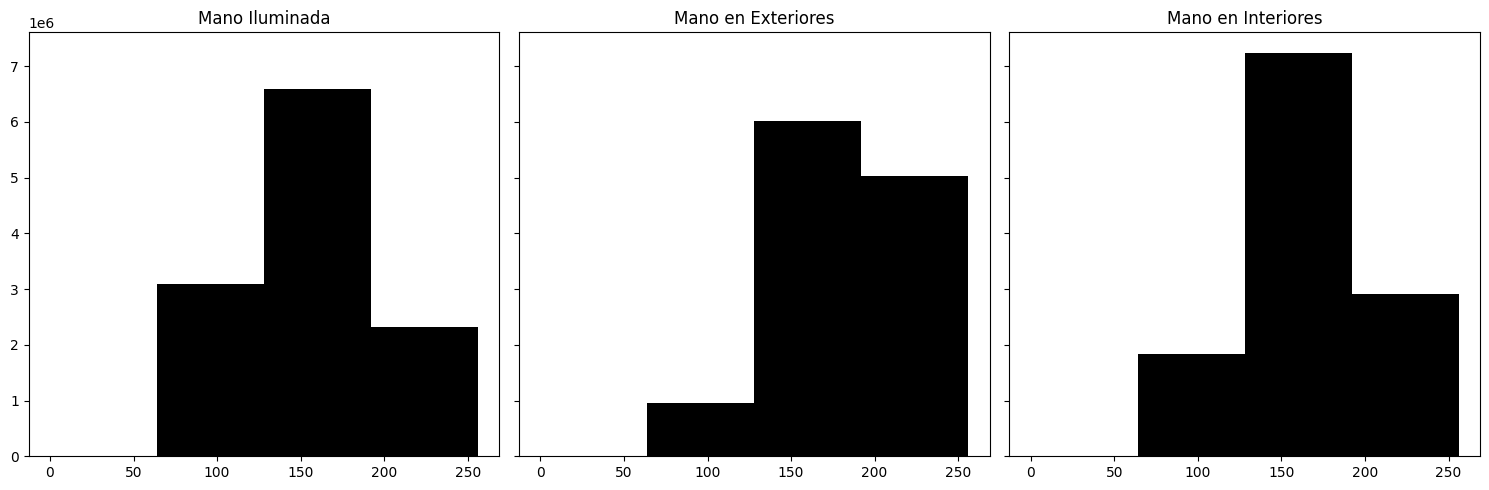

In [92]:
# 2 Bins
Bins=2**2
Mano_light_hist     =   cv2.calcHist([Mano_light],[0],None,[Bins],[0,Bins])
Mano_shadow_hist    =   cv2.calcHist([Mano_shadow],[0],None,[Bins],[0,Bins])
Mano_hist           =   cv2.calcHist([Mano],[0],None,[Bins],[0,Bins])

Mano_light_hist_Norm    =   cv2.normalize(Mano_light_hist,1,norm_type=cv2.NORM_INF)
Mano_shadow_hist_Norm   =   cv2.normalize(Mano_shadow_hist,1,norm_type=cv2.NORM_INF)
Mano_hist_Norm          =   cv2.normalize(Mano_hist,1,norm_type=cv2.NORM_INF)

fig, graph = plt.subplots(1,3, sharey=True, figsize=(15,5))

graph[0].hist(Mano_light.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[0].set_title('Mano Iluminada')

graph[1].hist(Mano_shadow.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[1].set_title('Mano en Exteriores')

graph[2].hist(Mano.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[2].set_title('Mano en Interiores')

fig.tight_layout()

## Comparacion de Histogramas
# Mano Vs Mano Light
Comp_Mano_Light_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Light_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Light_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Light_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Vs Mano Shadow
Comp_Mano_Shadow_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Shadow_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Shadow_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Shadow_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Light Vs Mano Shadow
Comp_Light_Shadow_Correl  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Light_Shadow_Chi     =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Light_Shadow_Inter   =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Light_Shadow_Bhatta  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Tabla
Table = PrettyTable(["Comparacion", "Correlacion", "Chi Cuadrado", "Interseccion", "Bhattacharyya"]) 
Table.add_row(["Mano vs Mano_Light", str(Comp_Mano_Light_Correl),str(Comp_Mano_Light_Chi), str(Comp_Mano_Light_Inter), str(Comp_Mano_Light_Bhatta)]) 
Table.add_row(["Mano vs Mano_Shadow", str(Comp_Mano_Shadow_Correl),str(Comp_Mano_Shadow_Chi), str(Comp_Mano_Shadow_Inter), str(Comp_Mano_Shadow_Bhatta)]) 
Table.add_row(["Mano_light vs Mano_Shadow", str(Comp_Light_Shadow_Correl),str(Comp_Light_Shadow_Chi), str(Comp_Light_Shadow_Inter), str(Comp_Light_Shadow_Bhatta)]) 

print(Table)

+---------------------------+-------------+--------------+--------------+---------------+
|        Comparacion        | Correlacion | Chi Cuadrado | Interseccion | Bhattacharyya |
+---------------------------+-------------+--------------+--------------+---------------+
|     Mano vs Mano_Light    |     1.0     |     0.0      |     0.0      |      1.0      |
|    Mano vs Mano_Shadow    |     1.0     |     0.0      |     0.0      |      1.0      |
| Mano_light vs Mano_Shadow |     1.0     |     0.0      |     0.0      |      1.0      |
+---------------------------+-------------+--------------+--------------+---------------+


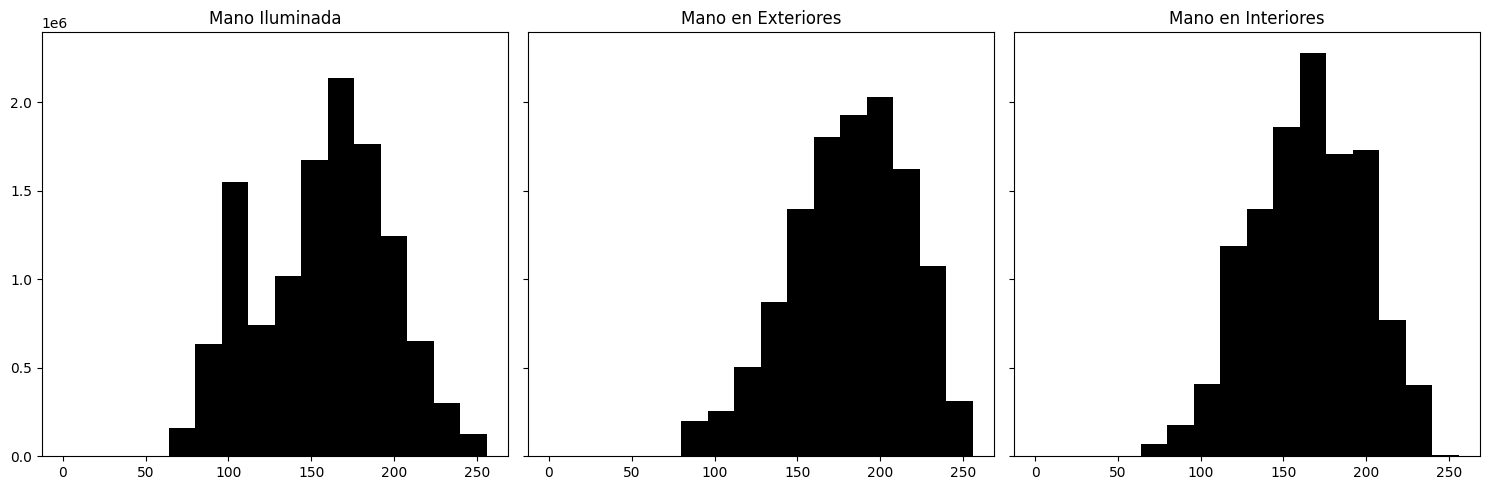

In [93]:
# 16 Bins
Bins=2**4
Mano_light_hist     =   cv2.calcHist([Mano_light],[0],None,[Bins],[0,Bins])
Mano_shadow_hist    =   cv2.calcHist([Mano_shadow],[0],None,[Bins],[0,Bins])
Mano_hist           =   cv2.calcHist([Mano],[0],None,[Bins],[0,Bins])

Mano_light_hist_Norm    =   cv2.normalize(Mano_light_hist,1,norm_type=cv2.NORM_INF)
Mano_shadow_hist_Norm   =   cv2.normalize(Mano_shadow_hist,1,norm_type=cv2.NORM_INF)
Mano_hist_Norm          =   cv2.normalize(Mano_hist,1,norm_type=cv2.NORM_INF)

fig, graph = plt.subplots(1,3, sharey=True, figsize=(15,5))

graph[0].hist(Mano_light.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[0].set_title('Mano Iluminada')

graph[1].hist(Mano_shadow.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[1].set_title('Mano en Exteriores')

graph[2].hist(Mano.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[2].set_title('Mano en Interiores')

fig.tight_layout()

## Comparacion de Histogramas
# Mano Vs Mano Light
Comp_Mano_Light_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Light_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Light_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Light_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Vs Mano Shadow
Comp_Mano_Shadow_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Shadow_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Shadow_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Shadow_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Light Vs Mano Shadow
Comp_Light_Shadow_Correl  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Light_Shadow_Chi     =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Light_Shadow_Inter   =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Light_Shadow_Bhatta  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Tabla
Table = PrettyTable(["Comparacion", "Correlacion", "Chi Cuadrado", "Interseccion", "Bhattacharyya"]) 
Table.add_row(["Mano vs Mano_Light", str(Comp_Mano_Light_Correl),str(Comp_Mano_Light_Chi), str(Comp_Mano_Light_Inter), str(Comp_Mano_Light_Bhatta)]) 
Table.add_row(["Mano vs Mano_Shadow", str(Comp_Mano_Shadow_Correl),str(Comp_Mano_Shadow_Chi), str(Comp_Mano_Shadow_Inter), str(Comp_Mano_Shadow_Bhatta)]) 
Table.add_row(["Mano_light vs Mano_Shadow", str(Comp_Light_Shadow_Correl),str(Comp_Light_Shadow_Chi), str(Comp_Light_Shadow_Inter), str(Comp_Light_Shadow_Bhatta)]) 

print(Table)

+---------------------------+--------------------+--------------------+--------------------+--------------------+
|        Comparacion        |    Correlacion     |    Chi Cuadrado    |    Interseccion    |   Bhattacharyya    |
+---------------------------+--------------------+--------------------+--------------------+--------------------+
|     Mano vs Mano_Light    | 0.8594216672766116 | 97.07183644112757  | 47.721934935439094 | 0.1860161368376553 |
|    Mano vs Mano_Shadow    | 0.8639733293238726 | 1136.7801947048758 | 48.287620192295435 | 0.2017119724355933 |
| Mano_light vs Mano_Shadow | 0.7406262769577642 |  47.715564915234   | 48.85941538645602  | 0.2563031401325636 |
+---------------------------+--------------------+--------------------+--------------------+--------------------+


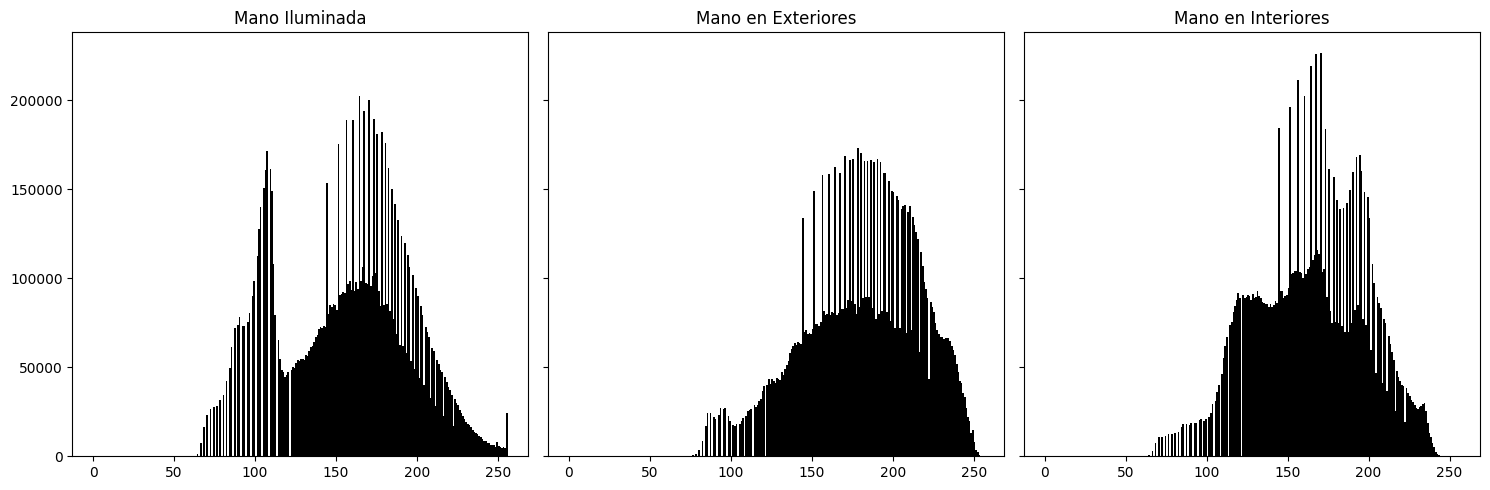

In [94]:
# 256 Bins
Bins=2**8
Mano_light_hist     =   cv2.calcHist([Mano_light],[0],None,[Bins],[0,Bins])
Mano_shadow_hist    =   cv2.calcHist([Mano_shadow],[0],None,[Bins],[0,Bins])
Mano_hist           =   cv2.calcHist([Mano],[0],None,[Bins],[0,Bins])

Mano_light_hist_Norm    =   cv2.normalize(Mano_light_hist,1,norm_type=cv2.NORM_INF)
Mano_shadow_hist_Norm   =   cv2.normalize(Mano_shadow_hist,1,norm_type=cv2.NORM_INF)
Mano_hist_Norm          =   cv2.normalize(Mano_hist,1,norm_type=cv2.NORM_INF)

fig, graph = plt.subplots(1,3, sharey=True, figsize=(15,5))

graph[0].hist(Mano_light.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[0].set_title('Mano Iluminada')

graph[1].hist(Mano_shadow.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[1].set_title('Mano en Exteriores')

graph[2].hist(Mano.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[2].set_title('Mano en Interiores')

fig.tight_layout()

## Comparacion de Histogramas
# Mano Vs Mano Light
Comp_Mano_Light_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Light_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Light_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Light_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Vs Mano Shadow
Comp_Mano_Shadow_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Shadow_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Shadow_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Shadow_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Light Vs Mano Shadow
Comp_Light_Shadow_Correl  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Light_Shadow_Chi     =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Light_Shadow_Inter   =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Light_Shadow_Bhatta  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Tabla
Table = PrettyTable(["Comparacion", "Correlacion", "Chi Cuadrado", "Interseccion", "Bhattacharyya"]) 
Table.add_row(["Mano vs Mano_Light", str(Comp_Mano_Light_Correl),str(Comp_Mano_Light_Chi), str(Comp_Mano_Light_Inter), str(Comp_Mano_Light_Bhatta)]) 
Table.add_row(["Mano vs Mano_Shadow", str(Comp_Mano_Shadow_Correl),str(Comp_Mano_Shadow_Chi), str(Comp_Mano_Shadow_Inter), str(Comp_Mano_Shadow_Bhatta)]) 
Table.add_row(["Mano_light vs Mano_Shadow", str(Comp_Light_Shadow_Correl),str(Comp_Light_Shadow_Chi), str(Comp_Light_Shadow_Inter), str(Comp_Light_Shadow_Bhatta)]) 

print(Table)

**Observaciones**

La distribución de grises a bajos Bins como 2 y 16, no da pie a una comparación adecuada con el total de información, por ello se observan valores ideales en las rutinas de comparación de Correlación, Chi cuadrado, Intersección y Bhattacharyya.

Caso contrario a 256 Bins, con Chi cuadrado se observa un desajuste considerable en las tres imagenes, similitud gracias a la Intersección, además de una buena similitud con la comparación Bhattacharyya.

##### **b. Comparación entre 8 y 32 Bins**

+---------------------------+-------------+--------------+--------------+---------------+
|        Comparacion        | Correlacion | Chi Cuadrado | Interseccion | Bhattacharyya |
+---------------------------+-------------+--------------+--------------+---------------+
|     Mano vs Mano_Light    |     1.0     |     0.0      |     0.0      |      1.0      |
|    Mano vs Mano_Shadow    |     1.0     |     0.0      |     0.0      |      1.0      |
| Mano_light vs Mano_Shadow |     1.0     |     0.0      |     0.0      |      1.0      |
+---------------------------+-------------+--------------+--------------+---------------+


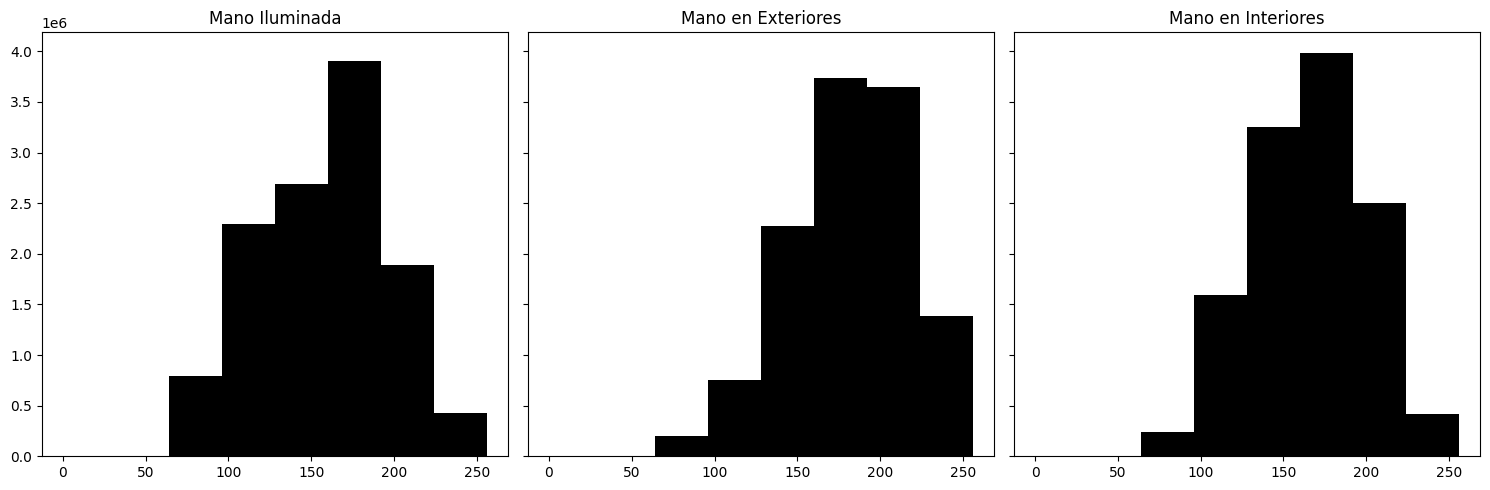

In [95]:
# 8 Bins
Bins=2**3
Mano_light_hist     =   cv2.calcHist([Mano_light],[0],None,[Bins],[0,Bins])
Mano_shadow_hist    =   cv2.calcHist([Mano_shadow],[0],None,[Bins],[0,Bins])
Mano_hist           =   cv2.calcHist([Mano],[0],None,[Bins],[0,Bins])

Mano_light_hist_Norm    =   cv2.normalize(Mano_light_hist,1,norm_type=cv2.NORM_INF)
Mano_shadow_hist_Norm   =   cv2.normalize(Mano_shadow_hist,1,norm_type=cv2.NORM_INF)
Mano_hist_Norm          =   cv2.normalize(Mano_hist,1,norm_type=cv2.NORM_INF)


fig, graph = plt.subplots(1,3, sharey=True, figsize=(15,5))

graph[0].hist(Mano_light.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[0].set_title('Mano Iluminada')

graph[1].hist(Mano_shadow.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[1].set_title('Mano en Exteriores')

graph[2].hist(Mano.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[2].set_title('Mano en Interiores')

fig.tight_layout()

## Comparacion de Histogramas
# Mano Vs Mano Light
Comp_Mano_Light_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Light_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Light_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Light_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Vs Mano Shadow
Comp_Mano_Shadow_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Shadow_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Shadow_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Shadow_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Light Vs Mano Shadow
Comp_Light_Shadow_Correl  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Light_Shadow_Chi     =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Light_Shadow_Inter   =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Light_Shadow_Bhatta  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)


# Tabla
Table = PrettyTable(["Comparacion", "Correlacion", "Chi Cuadrado", "Interseccion", "Bhattacharyya"]) 
Table.add_row(["Mano vs Mano_Light", str(Comp_Mano_Light_Correl),str(Comp_Mano_Light_Chi), str(Comp_Mano_Light_Inter), str(Comp_Mano_Light_Bhatta)]) 
Table.add_row(["Mano vs Mano_Shadow", str(Comp_Mano_Shadow_Correl),str(Comp_Mano_Shadow_Chi), str(Comp_Mano_Shadow_Inter), str(Comp_Mano_Shadow_Bhatta)]) 
Table.add_row(["Mano_light vs Mano_Shadow", str(Comp_Light_Shadow_Correl),str(Comp_Light_Shadow_Chi), str(Comp_Light_Shadow_Inter), str(Comp_Light_Shadow_Bhatta)]) 

print(Table)

+---------------------------+-------------+--------------+--------------+---------------+
|        Comparacion        | Correlacion | Chi Cuadrado | Interseccion | Bhattacharyya |
+---------------------------+-------------+--------------+--------------+---------------+
|     Mano vs Mano_Light    |     1.0     |     0.0      |     0.0      |      1.0      |
|    Mano vs Mano_Shadow    |     1.0     |     0.0      |     0.0      |      1.0      |
| Mano_light vs Mano_Shadow |     1.0     |     0.0      |     0.0      |      1.0      |
+---------------------------+-------------+--------------+--------------+---------------+


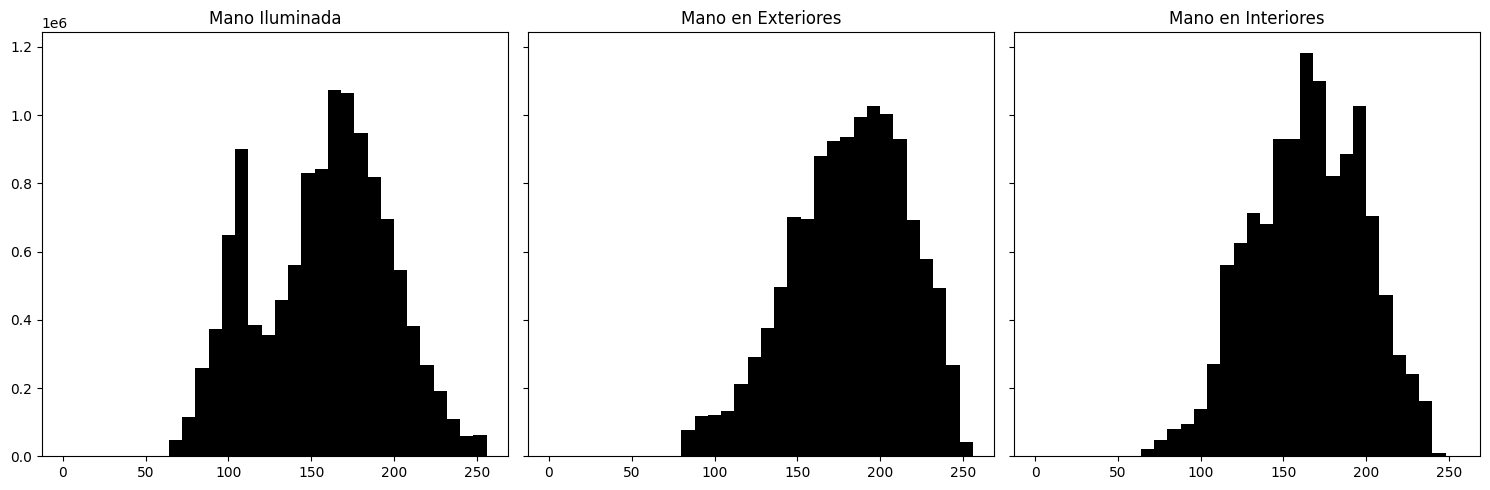

In [96]:
# 32 Bins
Bins=2**5
Mano_light_hist     =   cv2.calcHist([Mano_light],[0],None,[Bins],[0,Bins])
Mano_shadow_hist    =   cv2.calcHist([Mano_shadow],[0],None,[Bins],[0,Bins])
Mano_hist           =   cv2.calcHist([Mano],[0],None,[Bins],[0,Bins])

Mano_light_hist_Norm    =   cv2.normalize(Mano_light_hist,1,norm_type=cv2.NORM_INF)
Mano_shadow_hist_Norm   =   cv2.normalize(Mano_shadow_hist,1,norm_type=cv2.NORM_INF)
Mano_hist_Norm          =   cv2.normalize(Mano_hist,1,norm_type=cv2.NORM_INF)

fig, graph = plt.subplots(1,3, sharey=True, figsize=(15,5))

graph[0].hist(Mano_light.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[0].set_title('Mano Iluminada')

graph[1].hist(Mano_shadow.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[1].set_title('Mano en Exteriores')

graph[2].hist(Mano.ravel(),Bins,(0,2**8),facecolor='#000000')
graph[2].set_title('Mano en Interiores')

fig.tight_layout()

## Comparacion de Histogramas
# Mano Vs Mano Light
Comp_Mano_Light_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Light_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Light_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Light_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_light_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Vs Mano Shadow
Comp_Mano_Shadow_Correl  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Mano_Shadow_Chi     =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Mano_Shadow_Inter   =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Mano_Shadow_Bhatta  =   cv2.compareHist(Mano_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Mano Light Vs Mano Shadow
Comp_Light_Shadow_Correl  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CORREL)
Comp_Light_Shadow_Chi     =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_CHISQR)
Comp_Light_Shadow_Inter   =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_INTERSECT)
Comp_Light_Shadow_Bhatta  =   cv2.compareHist(Mano_light_hist_Norm,Mano_shadow_hist_Norm,cv2.HISTCMP_BHATTACHARYYA)

# Tabla
Table = PrettyTable(["Comparacion", "Correlacion", "Chi Cuadrado", "Interseccion", "Bhattacharyya"]) 
Table.add_row(["Mano vs Mano_Light", str(Comp_Mano_Light_Correl),str(Comp_Mano_Light_Chi), str(Comp_Mano_Light_Inter), str(Comp_Mano_Light_Bhatta)]) 
Table.add_row(["Mano vs Mano_Shadow", str(Comp_Mano_Shadow_Correl),str(Comp_Mano_Shadow_Chi), str(Comp_Mano_Shadow_Inter), str(Comp_Mano_Shadow_Bhatta)]) 
Table.add_row(["Mano_light vs Mano_Shadow", str(Comp_Light_Shadow_Correl),str(Comp_Light_Shadow_Chi), str(Comp_Light_Shadow_Inter), str(Comp_Light_Shadow_Bhatta)]) 

print(Table)

**Observaciones**

La distribución de grises a bajos Bins como 8 y 32, no da pie a una comparación adecuada con el total de información, por ello se observan valores ideales en las rutinas de comparación de Correlación, Chi cuadrado, Intersección y Bhattacharyya.